### *An Examination of Metabolic Adjustment, A Variant of Flux Balance Analysis*

The code below is designed to compare simulations of an E. coli metabolic model generated from flux balance analysis (FBA) and its variant, minimization of metabolic adjustments (MoMA). The code for the FBA representation of E. coli is from the FBA notebook given and supplemented with additional code for the MoMA representation of E. coli.

In [119]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cobra as cb

### *E. coli* Metabolic Model Using FBA


In [120]:
# load model
model = cb.io.read_sbml_model('iML1515.xml')

In [144]:
# Define environment
glc_min_med = []
def create_env(curr_model):
    # Set a blank slate
    for ex in curr_model.exchanges:
        ex.lower_bound = 0
        ex.upper_bound = 1000

    # glucose minimal medium
    glc_min_med = ['EX_pi_e','EX_co2_e','EX_fe3_e','EX_h_e','EX_mn2_e','EX_fe2_e','EX_glc__D_e','EX_zn2_e',
                   'EX_mg2_e','EX_ca2_e','EX_ni2_e','EX_cu2_e','EX_sel_e','EX_cobalt2_e','EX_h2o_e','EX_mobd_e',
                   'EX_so4_e','EX_nh4_e','EX_k_e','EX_na1_e','EX_cl_e','EX_o2_e','EX_tungs_e','EX_slnt_e']

    for ex_id in glc_min_med:
        curr_model.exchanges.get_by_id(ex_id).lower_bound = -1000
        #print(model.exchanges.get_by_id(ex_id).id, model.exchanges.get_by_id(ex_id).name)

    # set glucose exchange lower bound to -18.5
    curr_model.exchanges.get_by_id('EX_glc__D_e').lower_bound = -18.5

In [146]:
# Simulate Flux
create_env(model)
model.objective = 'BIOMASS_Ec_iML1515_core_75p37M'
solution = model.optimize()
print(solution.objective_value)

1.6443791812413233


In [157]:

def KO_flux(curr_model):

    create_env(curr_model)
    # Simulate Gene Deletion
    KO_genes = ['b1612','b4122','b1611','b2296','b2297','b2551','b4025','b1761',
                  'b0114','b1852','b0767','b0008','b3956','b2029','b3386','b0061',
                  'b0432','b2779','b0755','b2288','b3919','b3916','b1723','b3734',
                  'b1779','b2926','b2914','b4090','b2935','b2465']
    gene_names = []
    sols = []

    for gene in KO_genes:
        with model:
            curr_model.genes.get_by_id(gene).knock_out()
            solution1 = curr_model.optimize()
            sols.append(solution1.objective_value)
            gene_names.append(curr_model.genes.get_by_id(gene).name)
            #print('Biomass Flux with {:s} KO:{:f}'.format(curr_model.genes.get_by_id(gene).name,solution1.objective_value))
            print(solution1.objective_value)

    return sols

In [164]:
fba_vals = KO_flux(model)
fba_vals = [i/solution.objective_value for i in fba_vals]
print(fba_vals)


1.6443791812413318
1.6443791812413318
1.6443791812413318
1.6443791812413318
1.6443791812413318
1.623078397799453
1.6312142277750363
1.6443791812413315
1.6102923174279127
1.6371716722350818
1.637171672235073
1.644379181241339
1.639814184227259
1.6371716722350738
1.640087730548236
1.6443791812413389
1.4647748774706426
1.5092465745001908
1.6443791812413358
1.4299566304863691
1.5806998630434856
1.6443791812413315
1.6443791812413255
0.5772600020691594
1.4276042064412748
1.4276042064412773
1.6443791812413309
1.6443791812413349
1.6443791812413349
1.6443791812413349
[1.000000000000005, 1.000000000000005, 1.000000000000005, 1.000000000000005, 1.000000000000005, 0.9870463067856462, 0.9919939673182016, 1.000000000000005, 0.9792706790488074, 0.9956168813808499, 0.9956168813808447, 1.0000000000000095, 0.997223878126079, 0.995616881380845, 0.9973902304638473, 1.0000000000000095, 0.8907768318770009, 0.9178215047461727, 1.0000000000000075, 0.8696027332375438, 0.9612745533850855, 1.000000000000005, 1.0

### *E. coli* Metabolic Model Using MoMA

In [159]:
moma_model = cb.io.read_sbml_model('iML1515.xml')
cb.flux_analysis.add_moma(moma_model, linear=True)
create_env(moma_model)


In [166]:
#moma_vals = KO_flux(moma_model)



KO_genes = ['b1612','b4122','b1611','b2296','b2297','b2551','b4025','b1761',
              'b0114','b1852','b0767','b0008','b3956','b2029','b3386','b0061',
              'b0432','b2779','b0755','b2288','b3919','b3916','b1723','b3734',
              'b1779','b2926','b2914','b4090','b2935','b2465']
gene_names = []
sols = []

for gene in KO_genes:
    
    moma_model = cb.io.read_sbml_model('iML1515.xml')
    cb.flux_analysis.add_moma(moma_model, linear=True)
    create_env(moma_model)
    
    with model:
        moma_model.genes.get_by_id(gene).knock_out()
        solution1 = moma_model.optimize()
        sols.append(solution1.objective_value)
        gene_names.append(moma_model.genes.get_by_id(gene).name)
        #print('Biomass Flux with {:s} KO:{:f}'.format(curr_model.genes.get_by_id(gene).name,solution1.objective_value))
        print(solution1.objective_value)


-1.3424618404769828e-12
0.0
-1.3424618404769828e-12
-1.3424618404769828e-12
0.0
30.56367536507674
36.08267673261893
-1.3424618404769828e-12
66.12548139843341
27.9522837908999
27.952283790898303
-1.3424618404769828e-12
28.03317403822139
27.966715493984193
15.717792609021446
-1.3424618404769828e-12
126.44383700212643
180.83009192700857
-1.3424618404769828e-12
124.93059888965044
95.62479013620253
3.059612158631345
-1.3424618404769828e-12
274.11823665184545
203.08581309265244
203.0858130926531
-1.3424618404769828e-12
-1.3369583218292291e-12
-1.3424618404769828e-12
-1.3424618404769828e-12


In [168]:
moma_vals = [i/solution.objective_value for i in sols]
print(moma_vals)

[-8.163943303293183e-13, 0.0, -8.163943303293183e-13, -8.163943303293183e-13, 0.0, 18.586756457233037, 21.943039138564455, -8.163943303293183e-13, 40.21303732908856, 16.998685041608855, 16.998685041607885, -8.163943303293183e-13, 17.04787700915762, 17.0074614255773, 9.558496475950433, -8.163943303293183e-13, 76.89457422264091, 109.96860942407577, -8.163943303293183e-13, 75.97432533495208, 58.15251812177314, 1.860648805053393, -8.163943303293183e-13, 166.700138130499, 123.50303105841151, 123.5030310584119, -8.163943303293183e-13, -8.130474631891011e-13, -8.163943303293183e-13, -8.163943303293183e-13]


Text(0.5, 0, 'Normalized Growth Yield (FBA)')

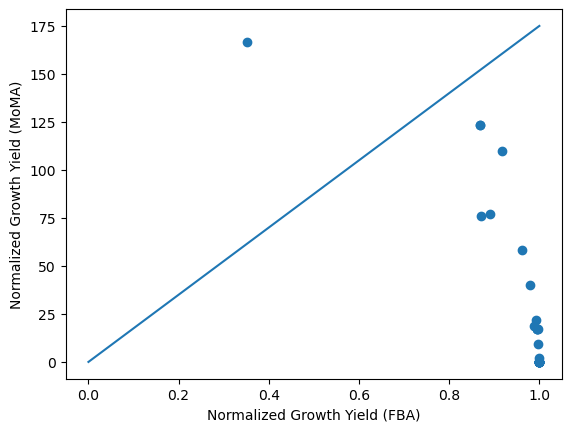

In [178]:
plt.figure()
plt.scatter(fba_vals, moma_vals)
plt.plot([0,175])
plt.ylabel('Normalized Growth Yield (MoMA)')
plt.xlabel('Normalized Growth Yield (FBA)')